<a href="https://colab.research.google.com/github/ehtisham409/code-champ/blob/master/simple_sytem_of_equation_byab_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import math, random, cmath
import matplotlib.pyplot as plt
from scipy.special import gamma

In [ ]:
def sampler_index(l_arr1,h_arr1,num):
  """this sampler function returns pair of randomly sampled index elements from tuples of ranges provided in input"""

  samples = np.zeros((num,1),dtype=int)
  for i in range(num):
    samples[i,0] = np.random.randint(l_arr1,h_arr1)

  return samples

In [ ]:
# Specifying number of input samples M for values of x and N for values of t
M = 50
# Limits for  -1 <= x <= 1
x_l = 0.0
x_h = 3.0
h = (x_h - x_l) / M
x = np.arange(x_l, x_h, h)
# Initial conditions for g1 and g2 functions
init_x_g1 = tf.Variable(np.array([[x_l]]))
g1_init_x = 0.0

init_x_g2 = tf.Variable(np.array([[x_l]]))
g2_init_x = 1.0


# Define the number of neurons in each layer for g1 function
n_nodes_hl1_g1 = 50
n_nodes_hl2_g1 = 50
n_nodes_hl3_g1 = 20
n_nodes_hl4_g1 = 20
n_nodes_hl5_g1 = 20
# Define the number of neurons in each layer for g2 function
n_nodes_hl1_g2 = 50
n_nodes_hl2_g2 = 50
n_nodes_hl3_g2 = 20
n_nodes_hl4_g2 = 20
n_nodes_hl5_g2 = 20

# Define the number of outputs for g1 and g2 function
n_classes_g1 = 1
n_classes_g2 = 1

# Defining hyperparameters for training
learn_rate_g1 = 0.01
learn_rate_g2 = 0.01

epochs = 10000
batch_size = 5

In [ ]:
# Creating model for function g1 for training
g1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(n_nodes_hl1_g1,activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(seed=1)),
                             tf.keras.layers.Dense(n_nodes_hl2_g1,activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(seed=1)),
                             #tf.keras.layers.Dense(n_nodes_hl3_g1,activation='', kernel_initializer=tf.keras.initializers.GlorotNormal(seed=1)),
                             #tf.keras.layers.Dense(n_nodes_hl4_g1,activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(seed=1)),
                             #tf.keras.layers.Dense(n_nodes_hl5_g1,activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(seed=1)),
                             tf.keras.layers.Dense(n_classes_g1, kernel_initializer=tf.keras.initializers.GlorotNormal(seed=1))
                            ])

optimizer_g1 = tf.keras.optimizers.Adam(learn_rate_g1)

In [ ]:
# Creating model for function g2 for training
g2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(n_nodes_hl1_g2,activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(seed=1)),
                             tf.keras.layers.Dense(n_nodes_hl2_g2,activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(seed=1)),
                             #tf.keras.layers.Dense(n_nodes_hl3_g2,activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(seed=1)),
                             #tf.keras.layers.Dense(n_nodes_hl4_g2,activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(seed=1)),
                             #tf.keras.layers.Dense(n_nodes_hl5_g2,activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal(seed=1)),
                             tf.keras.layers.Dense(n_classes_g2, kernel_initializer=tf.keras.initializers.GlorotNormal(seed=1))
                            ])

optimizer_g2 = tf.keras.optimizers.Adam(learn_rate_g2)

In [ ]:
def differential_eq_1(g1, g2, x, sample_indices, h):
  diff_op = 0.0
  for s in range(len(sample_indices)):
    i = sample_indices[s][0]
    x_i = x[i]
    x_tensor = tf.Variable(np.array([[x_i]]),dtype=tf.float32)
    with tf.GradientTape() as tape:
      tape.watch(x_tensor)
      g1_x = g1(x_tensor)
      g2_x = g2(x_tensor)
    pde_g1 = tape.gradient(g1_x, x_tensor)

    pde_g1_x = pde_g1[0][0]

    diff_op += (pde_g1_x - tf.cos(x_tensor)[0][0] - ((g1_x[0][0]) ** 2) - g2_x[0][0] + (1 + ((x_tensor[0][0]) ** 2) + ((tf.sin(x_tensor)[0][0]) ** 2)))

  return diff_op

In [ ]:
def differential_eq_2(g1, g2, x, sample_indices, h):
  diff_op = 0.0
  for s in range(len(sample_indices)):
    i = sample_indices[s][0]
    x_i = x[i]
    x_tensor = tf.Variable(np.array([[x_i]]),dtype=tf.float32)
    with tf.GradientTape() as tape:
      tape.watch(x_tensor)
      g1_x = g1(x_tensor)
      g2_x = g2(x_tensor)
      # pde_g1 is getting two derivatives w.r.t both x_i and t_n
    pde_g2 = tape.gradient(g2_x, x_tensor)
    # Partial derivative of "G1" w.r.t "t"
    pde_g2_x = pde_g2[0][0]

    diff_op += (pde_g2_x - (2 * x_tensor[0][0]) + ((1 + (x_tensor[0][0] ** 2)) * tf.sin(x_tensor)[0][0])  - (g1_x[0][0]) * (g2_x[0][0]))

  return diff_op

In [ ]:

for iteration in range(epochs):
    #Sampling for both differential equations
    samples_de = sampler_index(1, M, batch_size)
    # Sampling for initial condition of g1 and g2
    #ic_g1 = 0*tf.ones_like(init_x_g1)
    #ic_g2 = 0*tf.ones_like(init_x_g2)

    with tf.GradientTape() as tape_g1:
      loss_de_g1 = differential_eq_1(g1, g2, x, samples_de, h)
      loss_de_g2 = differential_eq_2(g1, g2, x, samples_de, h)
      loss_ic_g1 = batch_size * (g1(init_x_g1)[0][0] - g1_init_x)
      #######################################################################
      # Total loss of g1
      loss_g1 = (loss_de_g1 ** 2)+ (loss_de_g2 ** 2) + (loss_ic_g1 ** 2)
     ########################################################################
      # Calculating gradients
      grads_g1 = tape_g1.gradient(loss_g1, g1.trainable_variables)

    with tf.GradientTape() as tape_g2:
      loss_de_g1 = differential_eq_1(g1, g2, x, samples_de, h)
      loss_de_g2 = differential_eq_2(g1, g2, x, samples_de, h)

      loss_ic_g2 = batch_size * (g2(init_x_g2)[0][0] - g2_init_x)
      ##################################################################
      # Total loss of g2
      loss_g2 = (loss_de_g2 ** 2) + (loss_de_g2 ** 2) + (loss_ic_g2 ** 2)
      ####################################################################
      # Calculating gradients
      grads_g2 = tape_g2.gradient(loss_g2, g2.trainable_variables)

    if loss_g1/batch_size < 0.001 and loss_g2/batch_size < 0.001:
      break

    # Applying gradients to the both g1 and g2 models
    optimizer_g1.apply_gradients(zip(grads_g1, g1.trainable_variables))
    optimizer_g2.apply_gradients(zip(grads_g2, g2.trainable_variables))

    if (iteration + 1) % 10 == 0:
      print("Epoch {:4d}: g1 has loss {:4.5f} and g2 has loss {:4.5f}".format(iteration + 1, loss_g1/batch_size, loss_g2/batch_size))

print("\n##########################################################################################\n")
print("After running for {:4d} epochs, g1 has final loss {:4.5f} and g2 has final loss {:4.5f}".format(iteration + 1, loss_g1/batch_size, loss_g2/batch_size))


Epoch   10: g1 has loss 9.35072 and g2 has loss 12.13941
Epoch   20: g1 has loss 26.23582 and g2 has loss 32.28160
Epoch   30: g1 has loss 1.38746 and g2 has loss 3.18165
Epoch   40: g1 has loss 1.69424 and g2 has loss 3.37546
Epoch   50: g1 has loss 0.10769 and g2 has loss 1.25577
Epoch   60: g1 has loss 6.44562 and g2 has loss 9.14196
Epoch   70: g1 has loss 6.19706 and g2 has loss 8.64406
Epoch   80: g1 has loss 1.05470 and g2 has loss 2.45442
Epoch   90: g1 has loss 2.83279 and g2 has loss 1.00628
Epoch  100: g1 has loss 4.93566 and g2 has loss 8.41721
Epoch  110: g1 has loss 19.29555 and g2 has loss 32.30039
Epoch  120: g1 has loss 0.45388 and g2 has loss 0.55564
Epoch  130: g1 has loss 2.85339 and g2 has loss 3.98171
Epoch  140: g1 has loss 0.57354 and g2 has loss 1.84142
Epoch  150: g1 has loss 1.12649 and g2 has loss 0.73251
Epoch  160: g1 has loss 0.16773 and g2 has loss 0.35383
Epoch  170: g1 has loss 0.19075 and g2 has loss 1.16537
Epoch  180: g1 has loss 0.65012 and g2 has 

In [ ]:
M_valid = 2000
h_valid = (x_h - x_l) / M_valid
x_valid = np.arange(x_l, x_h, h_valid)

g1_pred = g1(x_valid.reshape(-1,1))[:,0]
g2_pred = g2(x_valid.reshape(-1,1))[:,0]

g1_valid = tf.sin(x_valid)
g2_valid = 1 + (x_valid ** 2)

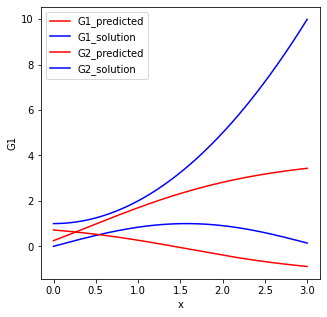

In [ ]:
# 2D plot for g1
plt.figure(figsize = (5, 5))
plt.plot(x_valid, g1_pred, 'r', label='G1_predicted')
plt.plot(x_valid, g1_valid, 'b', label='G1_solution')
plt.plot(x_valid, g2_pred, 'r', label='G2_predicted')
plt.plot(x_valid, g2_valid, 'b', label='G2_solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('G1')
plt.show()